# TSF - GRIP - Data Science and Business Analytics Internship
   <b> 
Intern : Harshil Deepak Patel

Task5 - Exploratory Data Analysis(EDA) - Sports
 
Problem Statement - Perform EDA on dataset Indian Premier League. As a sports analyst, find out:<b>
    
    1.Most successful teams and players
    
    2.Factors contributing to a team's win or loss
    
    3.Suggest teams or players a company should endorse for its products
        

Step1 - Importing libraries and dataset
Step2 - Data preprocessing
Step3 - Exploratory data analysis based on attributes of csv data
Step4 - Visualization of data to find results
Step5 - Finding solutions to 3 queries 
Step6 - Conclusion
Dataset - https://bit.ly/34SRn3b

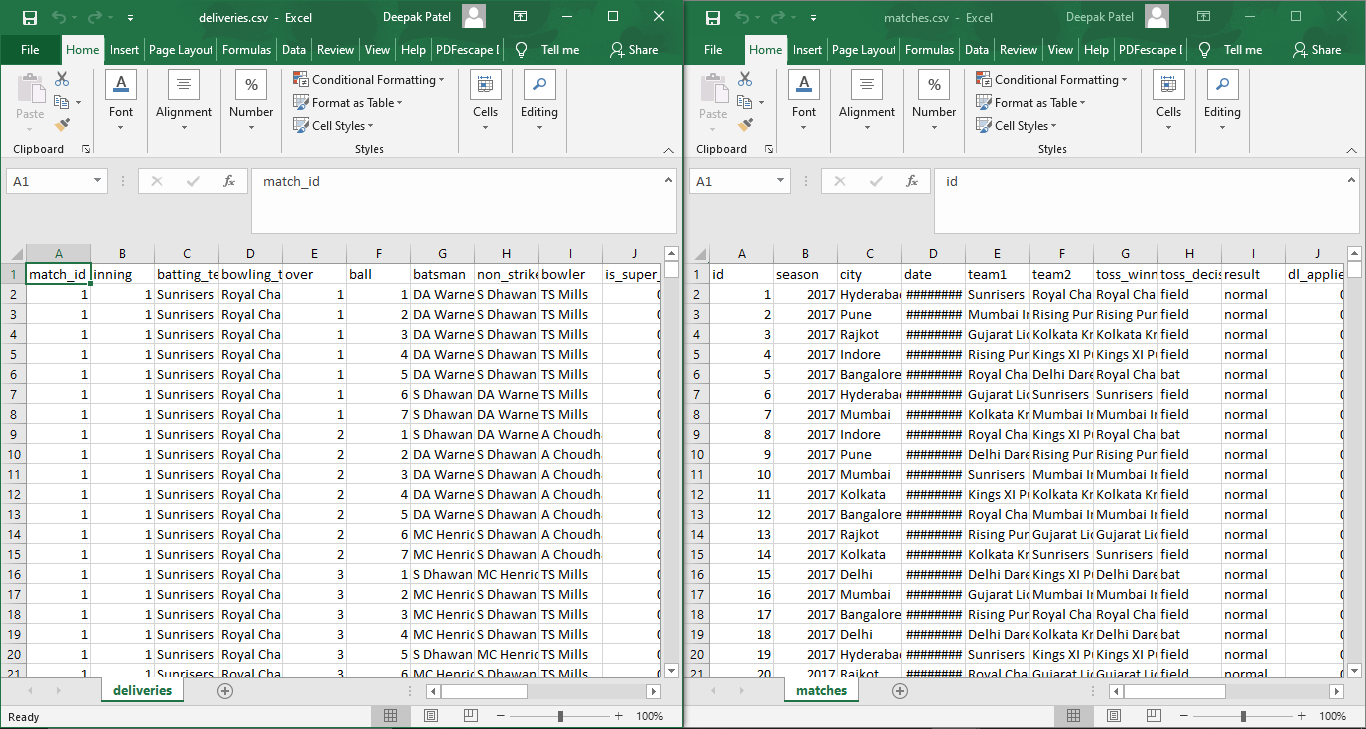

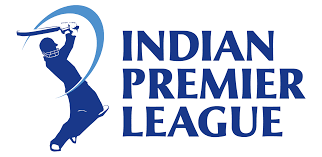

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\harshil\Desktop\SEM7\Pandemic work\TSF\Indian Premier League\matches.csv")
#data = pd.read_csv(r"C:\Users\harshil\Desktop\SEM7\Pandemic work\TSF\Indian Premier League\deliveries.csv")

In [3]:
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
data.shape

(756, 18)

In [6]:
data.info()
#This shows us all the attributes in our dataset which will be used for futher analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#Note a couple of things from above output: 
1. Mean win by runs is 13.2 
2. Mean win by wickers is 3
3. Max win by runs is 146 
4. Max win by wickets is 10

In [8]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
len(data['season'].unique())

12

In [12]:
data['dl_applied'].value_counts()
#DL is applied in only 19 matches out of a total of 756 matches. Thus, it is not an imp. factor

0    737
1     19
Name: dl_applied, dtype: int64

In [13]:
data['player_of_match'].unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

In [15]:
data['player_of_match'].value_counts()
#Note here that the player who has won 'player of the match' most times is 'CH Gayle' followed by 'AB de Villiers' 

CH Gayle             21
AB de Villiers       20
RG Sharma            17
DA Warner            17
MS Dhoni             17
                     ..
Mustafizur Rahman     1
S Gill                1
SM Katich             1
MD Mishra             1
MJ Lumb               1
Name: player_of_match, Length: 226, dtype: int64

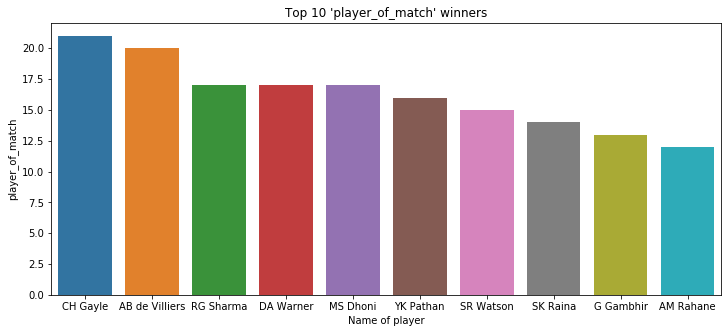

In [17]:
#Visualising the data we have achieved in the output of above command
top10 = data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize = (12,5))
ax.set_ylabel("Number of times won")
ax.set_xlabel("Name of player")
ax.set_title("Top 10 'player_of_match' winners")
sns.barplot(x = top10.index, y = top10)
plt.show()

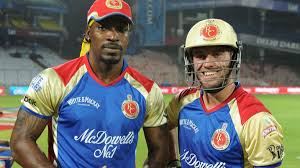

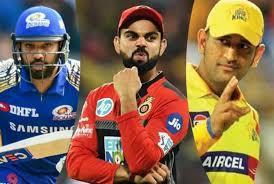

In [27]:
data.iloc[data['win_by_runs'].idxmax()]
#Team 'Mumbai Indians' beat 'Delhi Daredevils' by 146 runs which is highest win by runs

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [28]:
data.iloc[data['win_by_wickets'].idxmax()]
#Team 'Kolkata Knight Riders' beat 'Gujrat Lions' by 10 wickets which is highest run by wickets

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

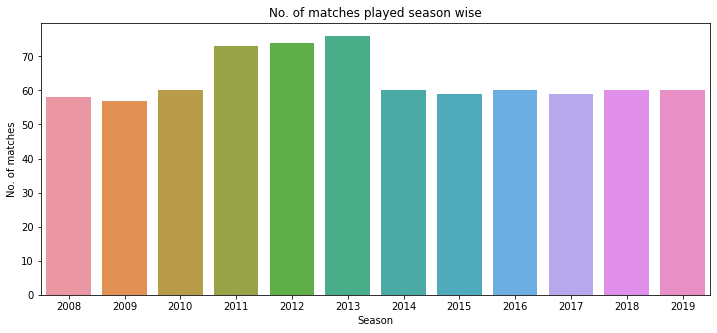

In [29]:
plt.figure(figsize = (12,5))
sns.countplot(data = data, x = 'season')
plt.xlabel("Season")
plt.ylabel("No. of matches")
plt.title("No. of matches played season wise")
plt.show()
#Most matches were played in the '2013' season

Text(0.5, 1.0, 'Toss as a factor in match winning or losing')

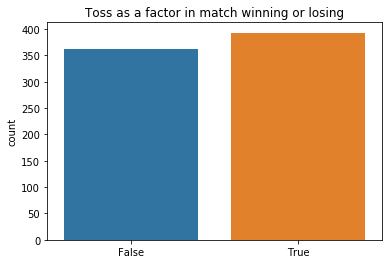

In [31]:
toss = data['toss_winner'] == data['winner']
toss.groupby(toss).size()
sns.countplot(toss)
plt.title("Toss as a factor in match winning or losing")
#Here count of True shows that toss winners were match winners

Text(0.5, 1.0, 'Most successful team in IPL i.e. most wins')

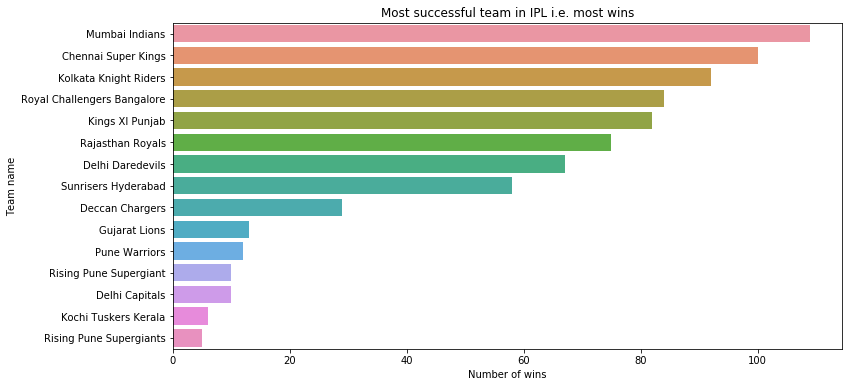

In [32]:
plt.figure(figsize = (12,6))
data = data.winner.value_counts()
sns.barplot(y = data.index, x = data)
plt.xlabel("Number of wins")
plt.ylabel("Team name")
plt.title("Most successful team in IPL i.e. most wins")
#Here we can see that 'Mumbai Indians' is the team with highest number of wins i.e. more than 100 making it most successful
#The next highest winning/ successful team is 'Chennai Super Kings' followed by 'Kolkata Knight Riders'

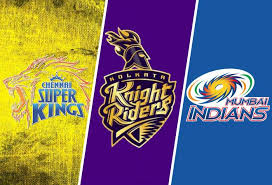

# Conclusion
<b>
The task was to perform EDA on dataset Indian Premier League. We initially had 2 datasets: deliveries and matches. The work of a sports analyst is important to a team from the aspect of sports, finance, management, etc. After importing, pre-processing, analyzing and visualizing this dataset, we find the following results:


    1. Most successful teams and players => 
    
    The most successful team is 'Mumbai Indians' with more than 100 wins followed by 'Chennai Super Kings' and 'Kolkata Knight Riders'. The player with the most player of the match wins is 'CH Gayle' followed by 'AB de Villiers' 
    
    2. Factors contributing to a team's win or loss => 
    
    The factors 'DL', 'venue' and 'city' don't have as much of an impact on a team's win or loss as compared to the 'toss' result.
    
    3. Suggest teams or players a company should endorse for its products => 
    
    The teams that should be considered for endorsement are 'Mumbai Indians', 'Chennai Super Kings' and 'Kolkata Knight Riders' whereas the players that should be considered for endorsement are 'CH Gayle', 'AB de Villiers', 'Rohit Sharma', 'Virat Kohli' and 'MS Dhoni'
        <b>